# Histogram filtering
The Histogram Filter predicts the next steps based on the knowledge it has gained from previous steps, but it's more than just a prediction. It’s used for state estimation in uncertain environments.

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]


<BarContainer object of 5 artists>

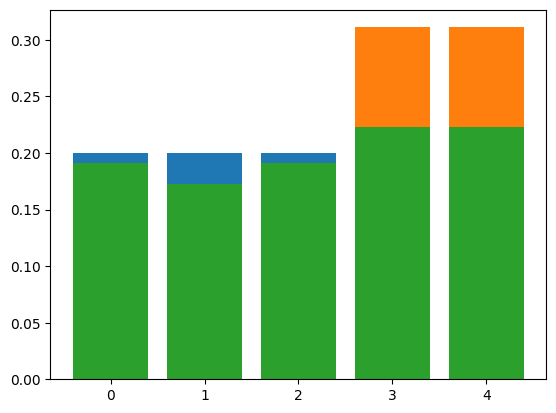

In [7]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, signal

no_of_blocks = 5
prb = 1/5

p = [prb, prb, prb, prb, prb]

plt.bar(range(no_of_blocks), p)

no_of_blocks = 5
prb = 1/5
p = [prb, prb, prb, prb, prb]

world = ['green', 'red', 'red', 'green', 'green']
z = 'red' # Measurement
pHit = 0.6
pMiss = 0.2

def sense(p,z):
    q = []
    for i in range(len(world)):
        hit = (z == world[i]) # True if measurement matches this part of the world, false if not.
        q.append(p[i]*(hit * pHit + (1- hit) * pMiss))
        
    q = np.array(q)/sum(q) # Divide the probability with the sum of all probabilities, to make it add up to 1.
    return q


q = sense(p,z)
print(q)

move_uncertainty=[0.1 , 0.8, 0.1]

def move(p, U, move_uncertainty):
    q=np.roll(p,U)
    q=ndimage.convolve1d(q,move_uncertainty,mode='wrap')
    return q

q = move(q, 2, move_uncertainty)
plt.bar(range(no_of_blocks), q)

for i in range(10):
    q = move(q, 2, move_uncertainty)
    
plt.bar(range(no_of_blocks), q)




5


C:\Users\oem\AppData\Local\Temp\ipykernel_24100\3874650996.py:24: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  q=ndimage.filters.convolve1d(q,move_uncertainty,mode='wrap')


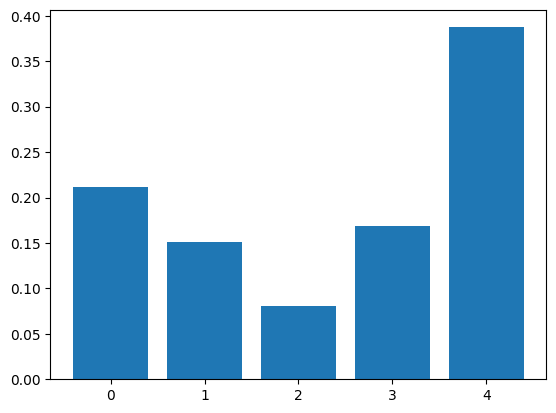

In [11]:
# We define the world, uncertainties, etc. as before.
no_of_blocks = 5 # World size
prb = 1/5 # Initial probability that the robot is in one of the positions
p = [prb, prb, prb, prb, prb] # Probability vector
world = ['green', 'red', 'red', 'green', 'green'] # Actual state of the world
measurements=['red','green'] # First measure red then green
phit=0.6 # Probability of correct detection of the true color of the block
pmiss=0.2 # Probability that the robot gives false reading
movements =[1,1] # One step to the right twice
move_uncertainty=[0.1 , 0.8, 0.1]

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i]) # For each block checks if the sensor reading matches the actual color of the block
        # hit = 0 means that it missed, hit = 1 means that it is correct
        q.append(p[i]*(hit * phit + (1- hit) * pmiss))

    q = np.array(q)/sum(q)
    return q

def move(p, U, move_uncertainty):
    q=np.roll(p,U)
    q=ndimage.filters.convolve1d(q,move_uncertainty,mode='wrap')
    return q

# We make a loop where we measure and move
for i in range(len(movements)):
    p=sense(p,measurements[i])
    p = move(p, movements[i], move_uncertainty)
    
plt.bar(range(no_of_blocks),p)

print(np.size(q))

# Exercise 1
We will now extent the histogram plot to work in 2D. You are given the world map and the move function below. We can now move up, down, left and right in the world. We can plot the map with the probabilities by using plt.imshow.
Insert a sense function that will work in 2D, and loop through the measurements and movements, while showing the probabilities using plt.imshow. You will also need to insert a 2D version of the move_uncertainty.

In [ ]:
no_of_blocks = 20
prb = 1/20

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb]]

# The world map
world = [['red', 'green', 'green', 'red', 'red'],
         ['red', 'red', 'green', 'red', 'red'],
         ['red', 'red', 'green', 'green', 'red'],
         ['red', 'red', 'red', 'red', 'red']]

measurements=['red','green', 'green', 'green']
phit=0.6
pmiss=0.2
movements =['up', 'up', 'up', 'left']

# Define move_uncertainty
move_uncertainty = np.array([[0.1, 0.1, 0.1],
                             [0.1, 0.4, 0.1],
                             [0.1, 0.1, 0.1]])


# Normalize a 2D list
def normalize(matrix):
    total = sum(sum(row) for row in matrix)
    return [[val / total for val in row] for row in matrix]


# Sense function
def sense(p, z):
    q = []
    for i in range(len(p)):
        row = []
        for j in range(len(p[0])):
            hit = (z == world[i][j])
            row.append(p[i][j] * (hit * phit + (1 - hit) * pmiss))
        q.append(row)
    return normalize(q)


# Move function
def move(p, u, move_uncertainty):
    rows, cols = len(p), len(p[0])
    q = [[0] * cols for _ in range(rows)]
    
    # Rolling based on movement
    if u == 'up':
        rolled_p = p[-1:] + p[:-1]
    elif u == 'down':
        rolled_p = p[1:] + p[:1]
    elif u == 'left':
        rolled_p = [row[1:] + row[:1] for row in p]
    elif u == 'right':
        rolled_p = [row[-1:] + row[:-1] for row in p]
    else:
        rolled_p = p
    
    # Convolve with move uncertainty
    for i in range(rows):
        for j in range(cols):
            for di, drow in enumerate(move_uncertainty):
                for dj, val in enumerate(drow):
                    ni = (i + di - 1) % rows  # Wrap index for rows
                    nj = (j + dj - 1) % cols  # Wrap index for columns
                    q[i][j] += rolled_p[ni][nj] * val
    return normalize(q)


# Visualization
plt.figure(figsize=(10, 10))
for i in range(len(movements)):
    # Update probabilities based on measurement
    p = sense(p, measurements[i])
    
    # Update probabilities based on movement
    p = move(p, movements[i], move_uncertainty)
    
    # Plot the current probability distribution
    plt.subplot(2, 2, i + 1)
    plt.imshow(p, cmap='hot', interpolation='nearest')
    plt.title(f"Step {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

# Kalman filter
Smart guesser that helps estimate the true value of something, when we can only take noisy or uncertain measurements. It works by using the key ideas: prediction - guess where something should be based on it's motion, correction - adjust the guess using noisy measurements.

### Gaussians
We use the because they tell us the most likely value (peak, mean u) and how confident we are in the guess (width, variance σ2).

### Starting Point:
- Car's position: u_old = 10 meters, sigma_old^2 = 2.

### Prediction:
- The car moves forward by 5 meters with some uncertainty: sigma_motion^2 = 3.
- Predicted position: u_pred = 10 + 5 = 15,  
  sigma_pred^2 = 2 + 3 = 5.

### Measurement:
- A sensor says the car is at u_meas = 14 meters, but it's noisy: sigma_meas^2 = 1.

### Correction:
- Combine prediction and measurement:  
μ_new = (1 * 15 + 5 * 14) / (1 + 5) = 14.17  
σ_new^2 = (1 * 5) / (1 + 5) = 0.83


19.84158415841584 15.384615384615383


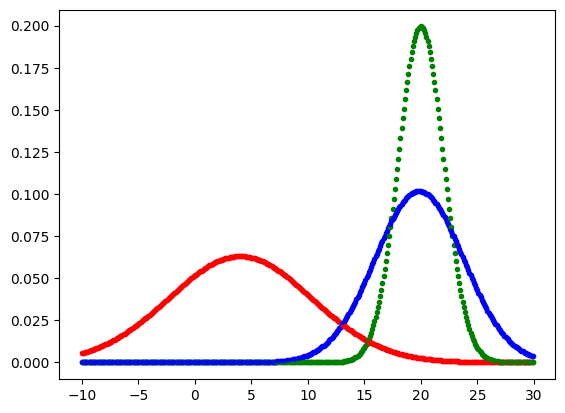

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, sigma2, x):
    # Gaussian distribution formula
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-0.5* ((x-u)**2/sigma2))

u = 4        # Mean for the first Gaussian
v = 20       # Mean for the second Gaussian
sigma1 = 40  # Variance for the first Gaussian
sigma2 = 4       # Variance for the second Gaussian


uprim = (u * sigma2**2 + v * sigma1**2) / (sigma2 ** 2 + sigma1 ** 2)

sigma_prim = 1 / (1/u**2 + 1/v**2)
print(uprim, sigma_prim)

for x in np.arange(-10, 30, 0.1):
    plt.plot(x, f(u, sigma1, x),'.r')
    plt.plot(x, f(v, sigma2, x),'.g')
    plt.plot(x, f(uprim, sigma_prim, x),'.b')